In [1]:
from fastai2.vision.all import *
from fastai2.vision.widgets import *

# The Amazing Bear Classifier!

You need to know whether you're being chased by a dangerous grizzly, or a sweet teddy bear, and you need an answer *fast*? Then you've come to the right place. Take a pic of the potentially vicious killer, and click 'upload' to classify it. (Important: this only handles grizzly bears, black bears, and teddy bears. It will **not** give a sensible answer for polar bears, a bear market, a bear of a man, or hot dogs.

----

In [2]:
defaults.use_cuda = False
learn_inf = torch.load('export.pkl', map_location='cpu')
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [3]:
def on_click(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [4]:
btn_upload.observe(on_click, names=['data'])

In [5]:
display(VBox([widgets.Label('Select your bear!'), btn_upload, out_pl, lbl_pred]))

## Let's Make Our PairWise Similarity Envine

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
%config InlineBackend.figure_format='retina'
%matplotlib notebook
sns.set(rc={'figure.figsize':(15.7,8.27)})
np.set_printoptions(suppress=True)

In [2]:
import torch
from torchvision import models

In [3]:
model = models.alexnet(pretrained=True)

In [4]:
image_pairs = [
    ('JeanieCubs.jpg', 'BaldBear.jpg'),
    ('JeanieCubs.jpg', 'Gorilla.jpg')
]

In [5]:
import lib.nethook as nethook
from pathlib import Path
from torchvision import transforms

root_dir = Path('images')

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def compare_images(model, image_pairs):
    # create dataloader from image_pairs
    imgs = [root_dir/img for imgs in image_pairs for img in imgs]
    dataset = ImageListDataset(imgs=imgs, transform=transform)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0, pin_memory=False)
    print(imgs)
    pass


In [6]:
# from collections import OrderedDict

# def get_activations(model, dataloader):
#     '''use nethook to retain features for all model layers'''
#     from pprint import pprint
#     print("==> Getting Activations")

#     device = 'cuda' if torch.cuda.is_available() else 'cpu'
#     layer_names = get_layers(model, parent_name='', layer_info=[])
#     pprint(layer_names)

#     if not isinstance(model, nethook.InstrumentedModel):
#         model = nethook.InstrumentedModel(model)
#     for layer_name in layer_names: model.retain_layer(layer_name)

#     # we only need a single forward pass because the dataset is small:
#     model = model.to(device)
#     model.eval()
#     with torch.no_grad():
#         imgs, labels, indexes = next(iter(dataloader))
#         model(imgs.to(device))
        
#     return layer_names, model

# def get_layer(m, layers):
#     layer = layers.pop(0)
#     m = getattr(m, layer)
#     if len(layers) > 0:
#         return get_layer(m, layers)
#     return m

# def get_layers(model, parent_name='', layer_info=[]):
#     for module_name, module in model.named_children():
#         layer_name = parent_name + '.' + module_name
#         if len(list(module.named_children())):
#             layer_info = get_layers(module, layer_name, layer_info=layer_info)
#         else:
#             layer_info.append(layer_name.strip('.'))
    
#     return layer_info

# def get_layer_type(model, layer_name):
#     m = get_layer(model, layer_name.split("."))
#     return m.__class__.__name__

# def convert_relu_layers(parent):
#     for child_name, child in parent.named_children():
#         if isinstance(child, nn.ReLU):
#             setattr(parent, child_name, nn.ReLU(inplace=False))
#         elif len(list(child.children())) > 0:
#             convert_relu_layers(child)
            
# def store_activations(model, layer_names):
#     a = OrderedDict()
#     for layer_num, layer_name in enumerate(layer_names):
#         layer_type = get_layer_type(model.model, layer_name)
#         X = model.retained_layer(layer_name)        
#         X = X.view(X.shape[0],-1)
#         a[layer_name] = X
#     return a            

In [55]:
# import os
# import torchvision.datasets as datasets
# from torch.utils.data import Dataset, DataLoader, random_split
# from glob import glob
# from pathlib import Path
# from PIL import Image
# from PIL import Image

# class ImageListDataset(Dataset):
#     """"""
#     def __init__(self, imgs, transform=None):
#         self.root_dir = None
#         self.files = imgs
#         self.transform = transform
                            
#     def __getitem__(self, index):
#         im = Image.open(self.files[index])
#         if self.transform:
#             im = self.transform(im)
                            
#         return im, 0, index

#     def __len__(self):
#         return len(self.files)    
    
#     def __repr__(self):
#         _repr_indent = 4
#         head = "Dataset " + self.__class__.__name__
#         body = ["Number of Images: {}".format(self.__len__())]
#         if self.root_dir is not None:
#             body.append("Root location: {}".format(self.root_dir))
#         if hasattr(self, "transform") and self.transform is not None:
#             body += [repr(self.transform)]        
#         lines = [head] + [" " * _repr_indent + line for line in body]
#         return '\n'.join(lines)

# def get_dataset(image_pairs):
#     transform = transforms.Compose([
#         transforms.Resize((224,224)),
#     ])
#     imgs = [root_dir/img for imgs in image_pairs for img in imgs]
#     dataset = ImageListDataset(imgs=imgs, transform=transform)
    
#     return dataset

# def stack_imgs(dataset):
#     imgs = []
#     for image_num in range(0, len(dataset), 2):
#         imgs.append(np.hstack([np.array(dataset[image_num][0]), np.array(dataset[image_num+1][0])]))
#     imgs = np.vstack(imgs)
    
#     return Image.fromarray(imgs)


In [8]:
root_dir = Path('images')
imgs = [root_dir/img for imgs in image_pairs for img in imgs]
dataset = ImageListDataset(imgs=imgs, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0, pin_memory=False)
dataset, dataloader

(Dataset ImageListDataset
     Number of Images: 4
     Compose(
     Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ), <torch.utils.data.dataloader.DataLoader at 0x7f9258f3e208>)

In [9]:
for img, image_name, index in dataloader:
    print(img.shape)

torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])


In [10]:
img.shape

torch.Size([1, 3, 224, 224])

In [11]:
import torch

layer_names, model = get_activations(model, dataloader)

==> Getting Activations
['features.0',
 'features.1',
 'features.2',
 'features.3',
 'features.4',
 'features.5',
 'features.6',
 'features.7',
 'features.8',
 'features.9',
 'features.10',
 'features.11',
 'features.12',
 'avgpool',
 'classifier.0',
 'classifier.1',
 'classifier.2',
 'classifier.3',
 'classifier.4',
 'classifier.5',
 'classifier.6']


In [12]:
import pandas as pd
from scipy.stats import pearsonr
from fastprogress import master_bar, progress_bar

device = 'cuda' if torch.cuda.is_available() else 'cpu'

df = pd.DataFrame(columns=['pair_num', 'image1', 'image2', 'layer_num', 'layer_name', 'layer_type', 'r'])

pair_num = 0
mb = master_bar(dataloader)
for count, (imgs, labels, indexes) in enumerate(mb):
    model(imgs.to(device))
    if count % 2 == 0:
        a1 = store_activations(model, layer_names)
        image1 = dataset.files[indexes].name
    if count % 2 == 1:
        a2 = store_activations(model, layer_names)
        image2 = dataset.files[indexes].name
        for layer_num, layer_name in enumerate(progress_bar(layer_names, parent=mb)):
            r = pearsonr(a1[layer_name].squeeze(), a2[layer_name].squeeze())[0]
            layer_type = get_layer_type(model.model, layer_name)
            df = df.append({
                "pair_num": pair_num,
                "image1": image1,
                "image2": image2,
                "layer_num": layer_num,
                "layer_name": layer_name,
                "layer_type": layer_type,
                "r": r,                
            }, ignore_index=True)
            
        pair_num += 1

In [23]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from glob import glob
from pprint import pprint
from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from IPython.core.debugger import set_trace

alexnet_pytorch_blocks = OrderedDict([
    ('Conv1', ['features.0','features.1','features.2']),
    ('Conv2', ['features.3','features.4','features.5']),
    ('Conv3', ['features.6','features.7']),
    ('Conv4', ['features.8','features.9']),
    ('Conv5', ['features.10','features.11','features.12']),
    ('', ['avgpool']),
    ('fc6', ['classifier.0','classifier.1','classifier.2']),
    ('fc7', ['classifier.3','classifier.4','classifier.5']),
    ('fc8', ['classifier.6']),
])

In [51]:
def plot_df(df, pairs=[0,1,2], title='', blocks=None, legend_loc=(0.79, 0.80), group_by='pair_num', ceiling=1, ylabel='correlation'):
    
    if pairs is None:
        #ax = plot_data(df, title, ymax=1.10, ymin=-0.20, hue=group_by, ylabel=ylabel)
        ax = plot_data(df[df.pair_num.isin(pairs)], title, ymax=1.10, ymin=-0.20, hue=group_by, ylabel=ylabel)
    else:
        ax = plot_data(df[df.pair_num.isin(pairs)], title, ymax=1.10, ymin=-0.20, hue=group_by, ylabel=ylabel)
    
    if blocks:
        draw_bg(blocks, ypos=1.03, legend_loc=legend_loc)
    
    L = ax.legend()
    legend_labels = ['image_pair']
    for pair in pairs:
        label = df[df.pair_num == pair].iloc[0].image1.replace('.jpg', '') + '_vs_' + df[df.pair_num == pair].iloc[0].image2.replace('.jpg', '')
        legend_labels.append(label)        
    for label_num, label in enumerate(legend_labels):
        if label is not None: L.get_texts()[label_num].set_text(label)
        
    return ax

def plot_data(df, title, ymax=.50, ymin=0.0, hue=None, ylabel='correlation'):
    sns.set(rc={'figure.figsize':(16.7,8.27)})
    sns.set_style("whitegrid", {'axes.grid' : False})
    ax = sns.lineplot(x="layer", y="y", hue=hue, data=df, linewidth=2)
    ax.set_title(title, fontsize=24);
    ax.set_ylabel(ylabel, fontsize=24, labelpad=15);
    ax.set_xlabel("layer", fontsize=24, labelpad=20);
    ax.set_ylim([ymin, ymax])
    plt.xticks(rotation=90);
    
    return ax

def draw_bg(blocks, ypos=0.475, alpha_b=.20, alpha_g=.15, legend_loc=(0.79, 0.80)):
    if blocks == None: return
    c = 0
    for idx, (block_name, layers) in enumerate(blocks.items()):
        n_layers = len(layers)
        for i in range(c, c+n_layers):
            if idx % 2 == 0:
                plt.axvspan(i-.5, i+.5, facecolor='b', alpha=alpha_b, lw=0)
            else:
                plt.axvspan(i-.5, i+.5, facecolor='gray', alpha=alpha_g, lw=0)
        plt.text(c+(n_layers)/2-.5, ypos, block_name, fontdict=None, fontsize=16, ha='center', va='center')
        c += n_layers
    plt.legend(facecolor=(0.95,0.95,0.95,1.0), bbox_to_anchor=legend_loc) 
    
def plot(df):
    df['y'] = df['r']
    layer_name = lambda x: "{:02d}_{}".format(x.layer_num,x.layer_type.replace("BatchNorm2d","Norm").replace("GroupNorm", "Norm"))
    df['layer'] = df[['layer_num','layer_type']].apply(layer_name, axis=1)
    
    blocks = alexnet_pytorch_blocks
    return plot_df(df, blocks=blocks)


In [40]:
# ax = plot(df)

In [56]:
dataset = get_dataset(image_pairs)
dataset

Dataset ImageListDataset
    Number of Images: 4
    Compose(
    Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
)

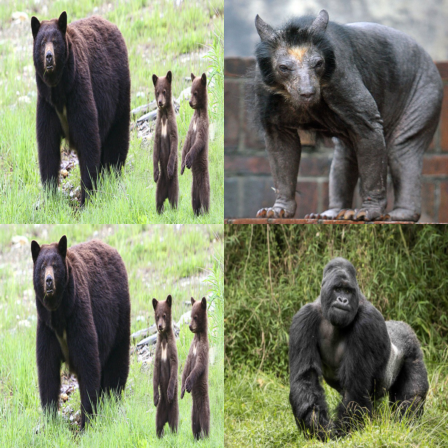

In [57]:
stack_imgs(dataset)

## General Setup and Standard Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
%config InlineBackend.figure_format='retina'
%matplotlib notebook
sns.set(rc={'figure.figsize':(15.7,8.27)})
np.set_printoptions(suppress=True)

In [3]:
from lib import *

## Step 1 - upload Images
- Here you can upload any images you plan to use. Images will be placed in the "images" folder.

In [4]:
show_upload()

## Step 2 - specify image pairs

In [5]:
# this command will list all of the .jpg images in your folder
!ls images/*.jpg

images/BaldBear.jpg		 images/Gorilla.jpg
images/bxht5jdhn4xyavmlrayn.jpg  images/JeanieCubs.jpg


In [48]:
# here we define a list [ ... ]
# with a comma-separated set of "tuples" ( ... )
# that define pairs of images to be compared
# So here "JeanieCubs.jpg" will be compared to 'BaldBear.jpg', and to 'Gorilla.jpg'
image_pairs = [
    ('JeanieCubs.jpg', 'BaldBear.jpg'),
    ('JeanieCubs.jpg', 'Gorilla.jpg'),
    ('BaldBear.jpg', 'Gorilla.jpg'),
    #('JeanieCubs.jpg', 'JeanieCubs.jpg')
]

#If we also wanted to compare 'BaldBear.jpg' and 'Gorilla.jpg', we could add a third pair in parentheses
# Don't forget to include comma after each set of parenteses
# image_pairs = [
#     ('JeanieCubs.jpg', 'BaldBear.jpg'),
#     ('JeanieCubs.jpg', 'Gorilla.jpg'), <-- notice the comma
#     ('BaldBear.jpg', 'Gorilla.jpg')
# ]

## Step 3 - create a dataset for your image_pairs

In [49]:
dataset = get_dataset(image_pairs)
dataset

Dataset ImageListDataset
    Number of Images: 6
    Compose(
    Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
)

## Step4 - visualize image pairs

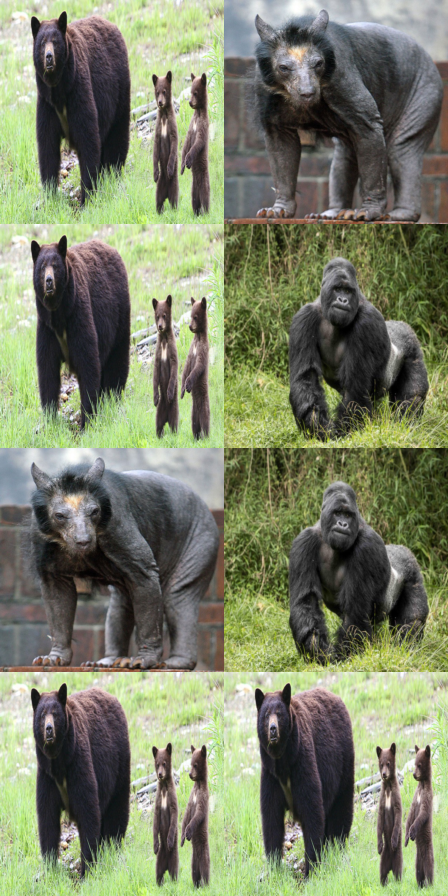

In [27]:
show_grid(dataset)

## Step5 - instantiate a model

In [28]:
# model = models.alexnet_imagenet()
model = models.alexnet(pretrained=True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Step6 - compute image similarity in each model layer

In [50]:
results = compute_similarity(model, dataset)
results.head()

,pair_num,image1,image2,layer_num,layer_name,layer_type,r
0,0,JeanieCubs.jpg,BaldBear.jpg,0,features.0,Conv2d,0.123220
1,0,JeanieCubs.jpg,BaldBear.jpg,1,features.1,ReLU,0.123220
2,0,JeanieCubs.jpg,BaldBear.jpg,2,features.2,MaxPool2d,0.167680
3,0,JeanieCubs.jpg,BaldBear.jpg,3,features.3,Conv2d,0.148025
4,0,JeanieCubs.jpg,BaldBear.jpg,4,features.4,ReLU,0.148025


## Step7 - plot results

In [61]:
df.pair_num

0     0
1     0
2     0
3     0
4     0
     ..
58    2
59    2
60    2
61    2
62    2
Name: pair_num, Length: 63, dtype: object

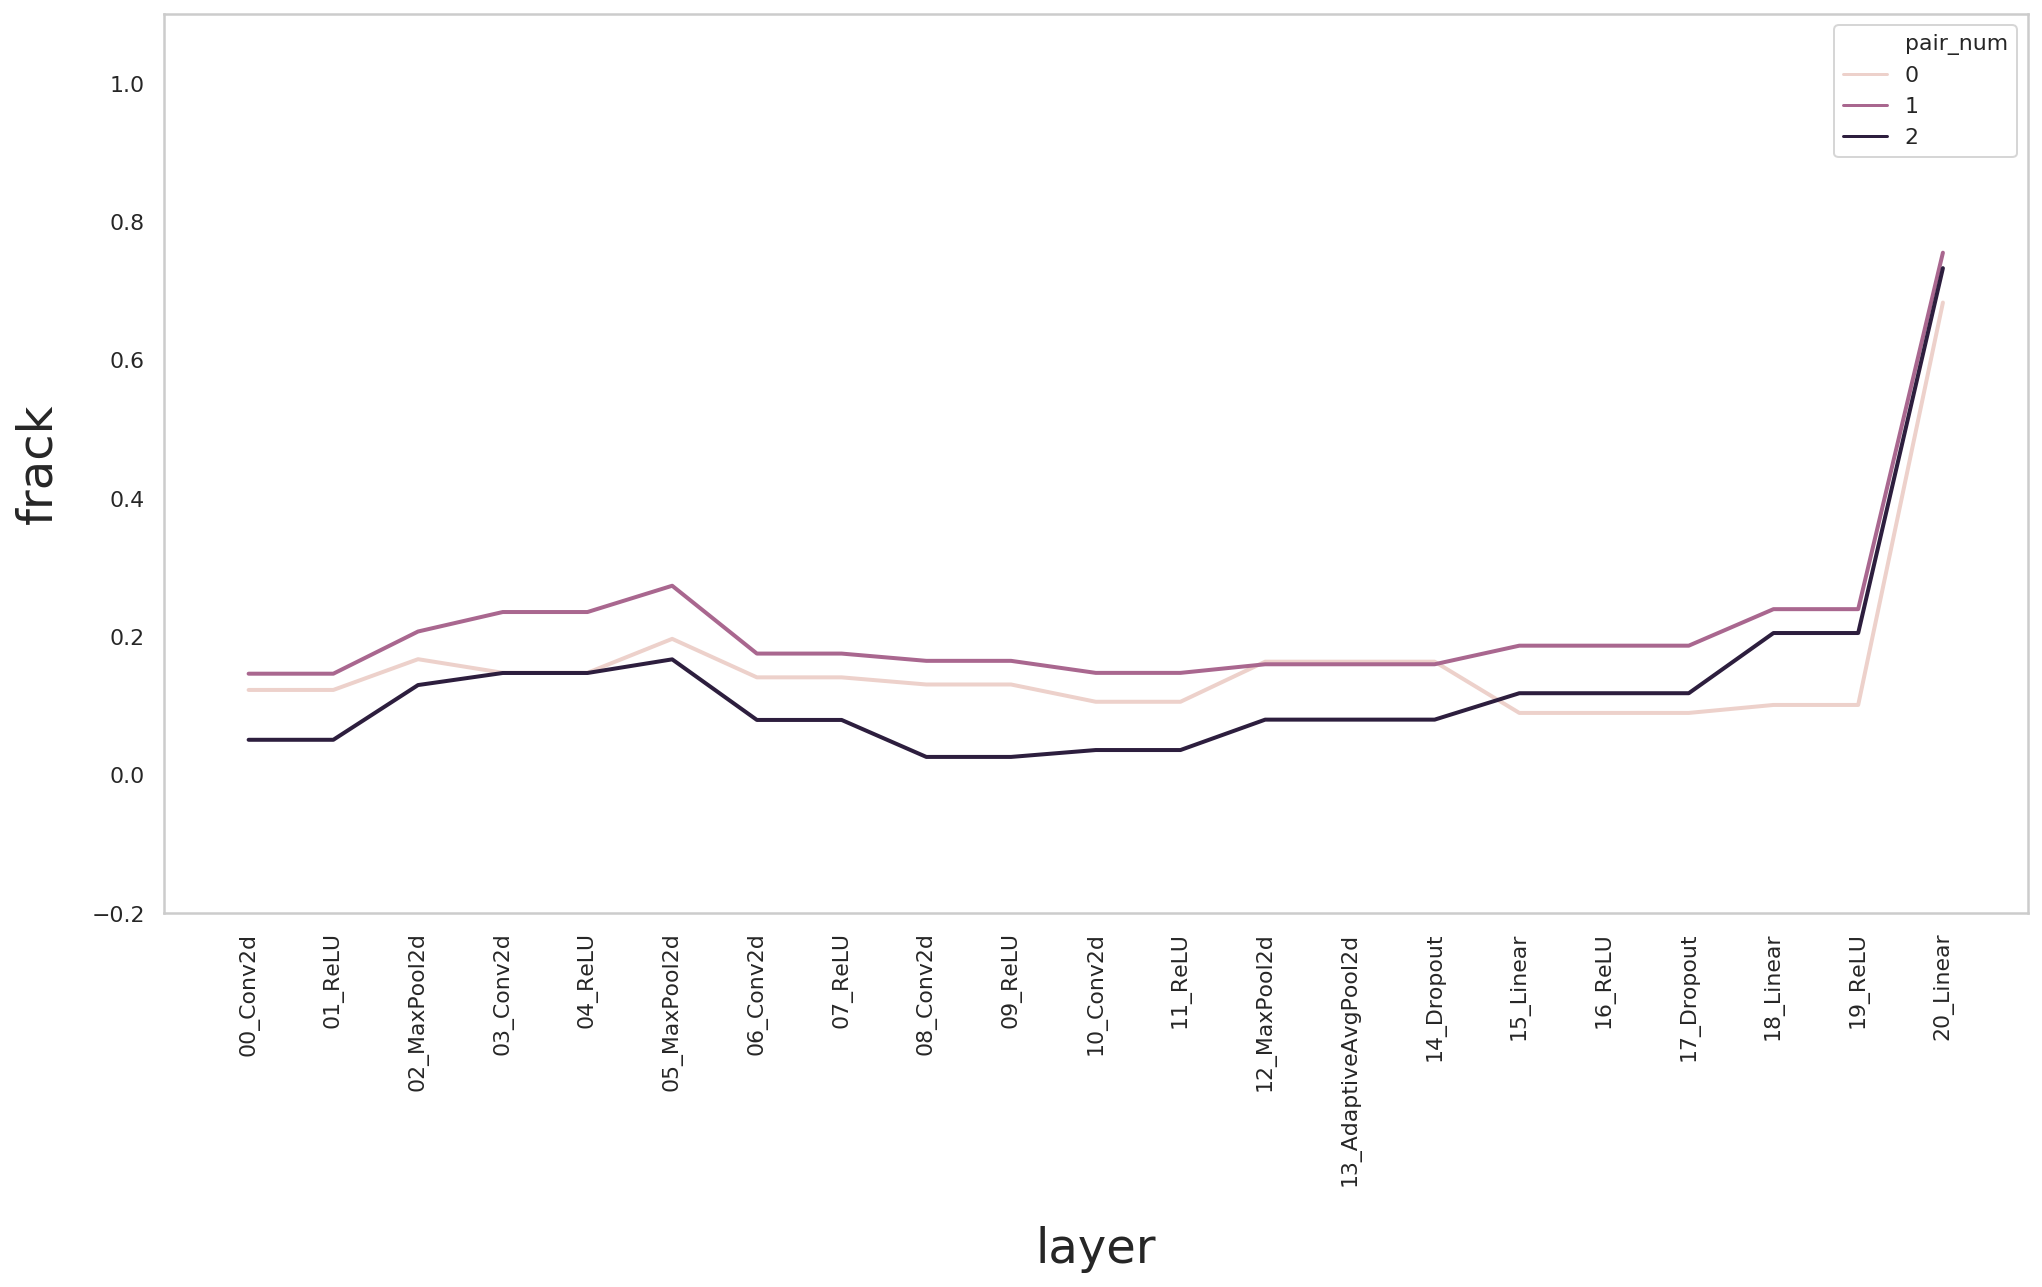

In [66]:
df = results
pairs = [0,1,2]
group_by = 'pair_num'
ylabel = 'frack'
df.pair_num = df.pair_num.astype(int)
df[df.pair_num.isin(pairs)]
ax = plot_data(df[df.pair_num.isin(pairs)], title='', ymax=1.10, ymin=-0.20, hue=group_by, ylabel=ylabel)

In [52]:
plot(results)

AttributeError: 'int' object has no attribute 'view'

## Step8 - document your observations and conclusions

### observations
The BrownBear is more similar to the Gorilla than to the BaldBear in most model layers.

### interpretation
The model appears to "see" the BrownBear as more similar to a Gorilla than to the BaldBear.

### discussion: Does this agree with your subjective impression?
